___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.width", 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from xgboost import XGBClassifier

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_male

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)
df_female

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df = pd.concat([df_female,df_male])
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df.shape

(6068, 108)

## Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,20757.198418,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
subjectid,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,0.028671,-0.080712,-0.049426,-0.086444,-0.053103,-0.054291,-0.015120,-0.069990,-0.022891,-0.031233,0.042649,-0.049184,-0.065412,-0.019509,-0.069493,-0.032708,-0.040080,-0.022426,-0.044245,-0.188644,0.050830,-0.124125,-0.090568,-0.001614,-0.102278,-0.045490,-0.060872,-0.096064,-0.074443,-0.086128,-0.047800,-0.105716,-0.071225,-0.085648,-0.046868,-0.047340,-0.065551,-0.066234,-0.078628,-0.005070,-0.006978,-0.019887,-0.054759,-0.049501,-0.061439,-0.076019,-0.020008,-0.060229,0.022690,-0.108278,-0.024678,-0.038105,-0.082325,-0.091560,-0.181247,-0.051407,-0.008812,-0.049174,-0.091403,-0.065909,-0.103673,-0.075831,-0.047119,-0.023850,-0.095486,-0.064599,-0.072702,-0.002508,-0.030551,-0.105709,-0.102849,-0.072272,-0.005139,-0.046164,-0.082941,-0.039864,-0.062869,-0.065869,-0.047512,-0.149275,-0.044038,-0.066602,-0.101394,-0.037595,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,0.724471,0.371894,0.529000,0.621899,0.496898,0.741188,0.841581,0.258496,0.483275,0.333003,0.657287,0.346116,0.631068,0.826382,0.780450,0.304562,0.203336,0.466971,0.209593,0.247567,0.402031,0.132538,0.256314,0.282460,0.440374,0.354184,0.356183,0.629757,0.728564,0.317555,0.423842,0.426221,0.462871,0.311137,0.341047,0.370753,0.342171,0.509410,0.439029,0.597205,0.557642,0.268208,0.256375,0.603114,0.546482,0.288285,0.359487,0.235804,0.353888,0.673955,0.297767,0.658587,0.629364,0.329005,0.322198,0.163311,0.291144,0.639949,0.296521,0.192526,0.276912,0.429903,0.286739,0.327873,0.316876,0.361806,0.304103,0.732133,0.725401,0.396786,0.275044,0.183890,0.243939,0.729533,0.572025,0.859924,0.939899,0.958932,0.579296,0.162457,0.825714,0.550544,0.389220,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,0.633088,0.705621,0.569411,0.581562,0.478282,0.302339,0.355987,0.870776,0.817915,0.755708,0.413845,0.984230,0.549632,0.538292,0.293602,0.960106,0.901554,0.353748,0.421327,0.365927,0.434054,0.268885,0.282664,0.813120,0.667315,0.830812,0.849715,0.640346,0.578

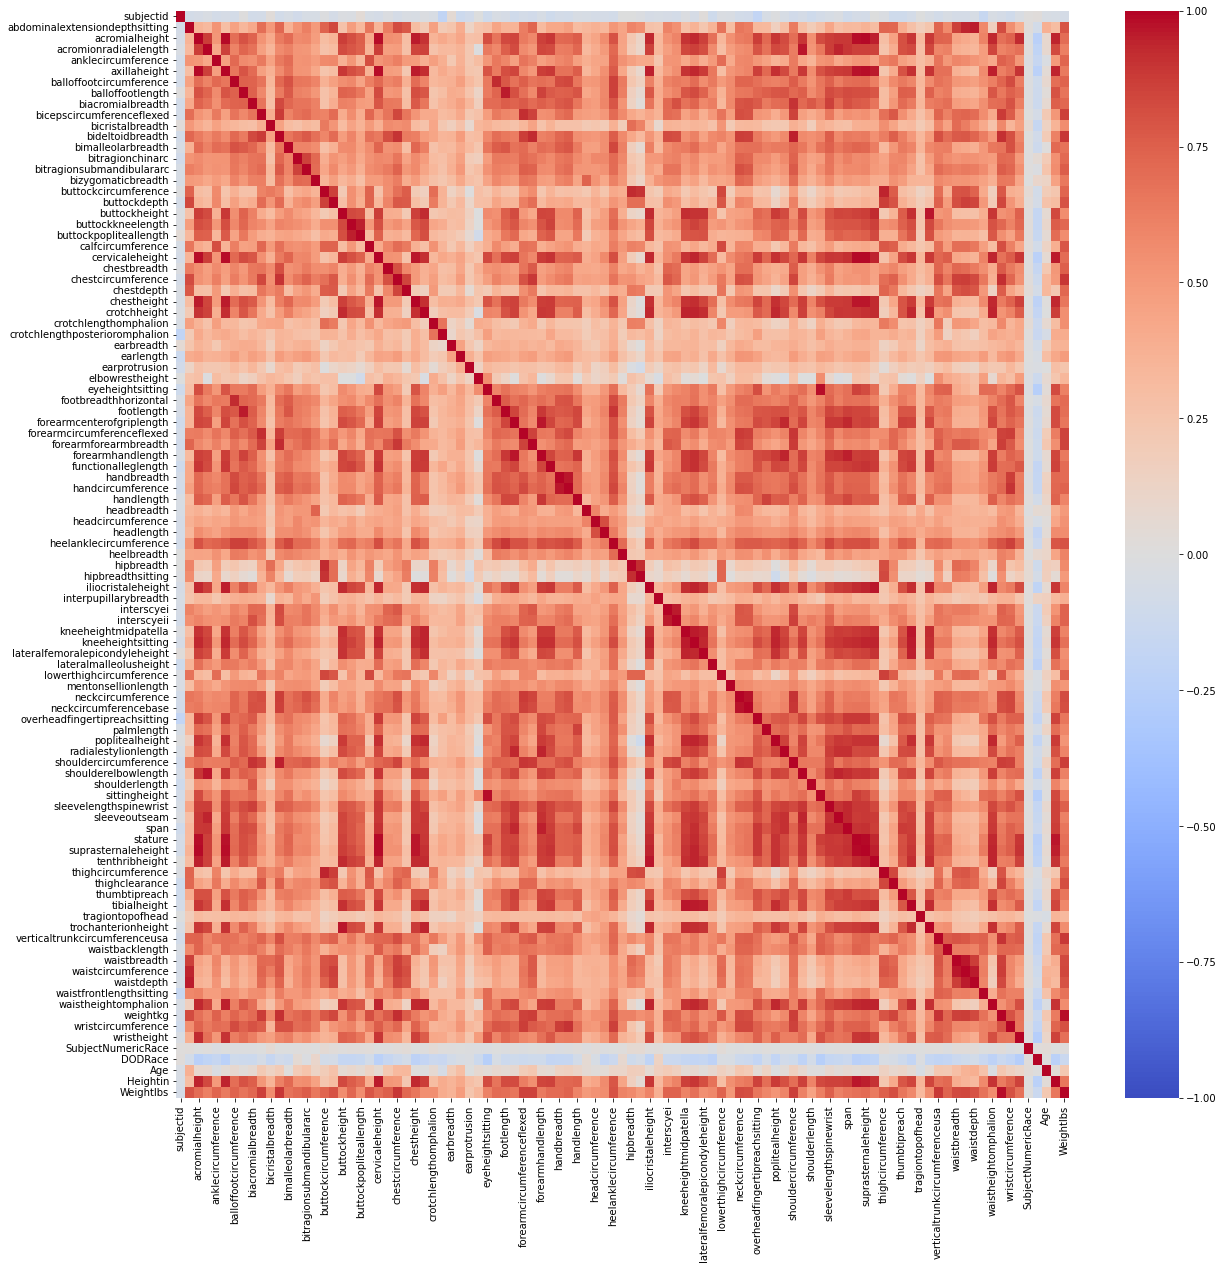

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm");

In [ ]:
df.nunique()

subjectid                         6068
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

Drop outliers

In [ ]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = len(outliers)

        print(f"{column:<30}: {num_outliers} outliers detected")

        # Remove outliers from the DataFrame
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
filtered_df = remove_outliers_iqr(df)

print(filtered_df)

subjectid                     : 1 outliers detected
abdominalextensiondepthsitting: 46 outliers detected
acromialheight                : 15 outliers detected
acromionradialelength         : 31 outliers detected
anklecircumference            : 70 outliers detected
axillaheight                  : 10 outliers detected
balloffootcircumference       : 6 outliers detected
balloffootlength              : 6 outliers detected
biacromialbreadth             : 0 outliers detected
bicepscircumferenceflexed     : 14 outliers detected
bicristalbreadth              : 58 outliers detected
bideltoidbreadth              : 5 outliers detected
bimalleolarbreadth            : 1 outliers detected
bitragionchinarc              : 39 outliers detected
bitragionsubmandibulararc     : 7 outliers detected
bizygomaticbreadth            : 13 outliers detected
buttockcircumference          : 34 outliers detected
buttockdepth                  : 9 outliers detected
buttockheight                 : 20 outliers detected
b

In [ ]:
pd.concat([df, filtered_df])
df.reset_index(drop=True, inplace=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df.shape

(6068, 108)

Drop class that have less than 500 observation

In [ ]:
df.DODRace.value_counts() #Target

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

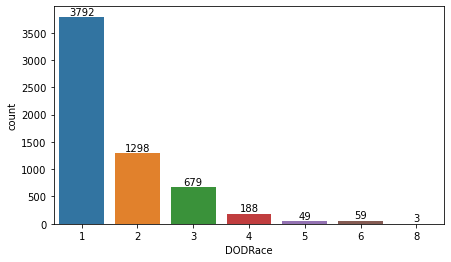

In [ ]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

In [ ]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
drop_model = df.DODRace.value_counts()[df.DODRace.value_counts() <= 500].index
drop_model

Int64Index([4, 6, 5, 8], dtype='int64')

In [ ]:
for i in drop_model:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True) #

In [ ]:
df.DODRace.unique()

array([2, 3, 1], dtype=int64)

In [ ]:
race_mapping = df.DODRace.map({ 1: "White", 2: "Black", 3: "Hispanic" })

In [ ]:
df["DODRace"] = df["DODRace"].replace(race_mapping)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,White,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,Black,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,Hispanic,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,White,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187

In [ ]:
df.DODRace.value_counts()

Hispanic    3792
White       1298
Black        679
Name: DODRace, dtype: int64

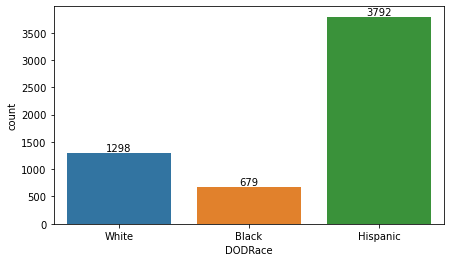

In [ ]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

In [ ]:
df.DODRace.unique()

array(['White', 'Black', 'Hispanic'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(98), object(10)
memory usage: 4.8+ MB


In [ ]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,White,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,Black,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,Hispanic,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,White,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187

Drop unuesefull features

In [ ]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

- Drop (Ethnicity) column because it have too many missing value
- Drop (Date, SubjectId, Weightlbs,Installation, PrimaryMOS, Heightin) columns because it does not have a strong effect on data
- Drop (SubjectNumericRace) column because it seems like DODRace

In [ ]:
droped_data = [ "Date", "subjectid", "Weightlbs","Installation",
               "SubjectNumericRace", "PrimaryMOS", "Heightin", "Ethnicity"]

df.drop(droped_data , axis=1 , inplace=True)

In [ ]:
df.shape

(5769, 100)

In [ ]:
df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Regular Army,Combat Support,Germany,White,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,Regular Army,Combat Service Support,California,Black,21,Right hand


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null  

In [ ]:
for col in df:
    print(f"{col:<30}:", df[col].nunique())

abdominalextensiondepthsitting: 218
acromialheight                : 425
acromionradialelength         : 129
anklecircumference            : 110
axillaheight                  : 396
balloffootcircumference       : 107
balloffootlength              : 84
biacromialbreadth             : 167
bicepscircumferenceflexed     : 236
bicristalbreadth              : 132
bideltoidbreadth              : 239
bimalleolarbreadth            : 37
bitragionchinarc              : 107
bitragionsubmandibulararc     : 124
bizygomaticbreadth            : 48
buttockcircumference          : 426
buttockdepth                  : 159
buttockheight                 : 315
buttockkneelength             : 204
buttockpopliteallength        : 176
calfcircumference             : 195
cervicaleheight               : 445
chestbreadth                  : 131
chestcircumference            : 520
chestdepth                    : 160
chestheight                   : 415
crotchheight                  : 308
crotchlengthomphalion         :

Map Gender to numeric data

In [ ]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

Gender                        : 2
Component                     : 3
Branch                        : 3
SubjectsBirthLocation         : 136
DODRace                       : 3
WritingPreference             : 3


- SubjectsBirthLocation has a huge number of unique value so I minmize them by group them

In [ ]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [ ]:
location_group = df.SubjectsBirthLocation.value_counts()[df.SubjectsBirthLocation.value_counts() <= 50].index
location_group

Index(['Oregon', 'Mexico', 'Connecticut', 'Jamaica', 'Nebraska', 'Utah', 'West Virginia', 'Nevada', 'Idaho', 'District of Columbia',
       ...
       'Bulgaria', 'British Virgin Islands', 'Sri Lanka', 'Azerbaijan', 'Venezuela', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark', 'South Korea', 'Guatemala'], dtype='object', length=102)

In [ ]:
dic = {
    "country" : location_group,
    "values" : df.SubjectsBirthLocation.value_counts()[location_group]
}
pd.DataFrame(dic)

,country,values
Oregon,Oregon,40
Mexico,Mexico,39
Connecticut,Connecticut,36
Jamaica,Jamaica,35
Nebraska,Nebraska,30
Utah,Utah,27
West Virginia,West Virginia,26
Nevada,Nevada,21
Idaho,Idaho,20
District of Columbia,District of Columbia,19


In [ ]:
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].replace(location_group,'other')

In [ ]:
df.SubjectsBirthLocation.value_counts()

other             716
California        417
New York          411
Texas             386
Indiana           264
Florida           210
Illinois          210
Oklahoma          205
Michigan          194
Minnesota         194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Germany            90
Puerto Rico        88
New Jersey         88
Missouri           83
Maryland           78
Colorado           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
South Dakota       53
Arkansas           53
Name: SubjectsBirthLocation, dtype: int64

In [ ]:
df["SubjectsBirthLocation"].nunique()

35

In [ ]:
df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [ ]:
from ipywidgets import interact
i=0
def box_strip(model):
    sns.boxplot(data = df.iloc[:, i],
                palette='bright')

    sns.stripplot(data = df.iloc[:, i])
model = df
interact(box_strip, model=model);

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [ ]:
df.shape

(5769, 100)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
target = 'DODRace'
X =df.drop('DODRace',axis=1)
y = df[target]
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (5769, 99)
Shape of Y is  : (5769,)
Shape of df is : (5769, 100)


In [ ]:
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state=42,stratify =y)

In [ ]:
X_test.shape

(1154, 99)

In [ ]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

Gender                        : 2
Component                     : 3
Branch                        : 3
SubjectsBirthLocation         : 35
DODRace                       : 3
WritingPreference             : 3


In [ ]:
for i in numeric_columns:
    if (df[i].unique().size):
        print(i+": " ,df[i].unique(), "\nsize is: ", df[i].unique().size)
        print("\n")

Gender:  ['Female' 'Male'] 
size is:  2


Component:  ['Regular Army' 'Army National Guard' 'Army Reserve'] 
size is:  3


Branch:  ['Combat Support' 'Combat Service Support' 'Combat Arms'] 
size is:  3


SubjectsBirthLocation:  ['Germany' 'California' 'Texas' 'other' 'Virginia' 'Massachusetts'
 'Michigan' 'Colorado' 'South Dakota' 'Louisiana' 'Ohio' 'South Carolina'
 'Mississippi' 'Illinois' 'New York' 'Iowa' 'Florida' 'Oklahoma'
 'Pennsylvania' 'North Carolina' 'Alabama' 'Wisconsin' 'Arizona'
 'Washington' 'Kentucky' 'Tennessee' 'Kansas' 'Georgia' 'Indiana'
 'Puerto Rico' 'Maryland' 'New Jersey' 'Missouri' 'Minnesota' 'Arkansas'] 
size is:  35


DODRace:  ['White' 'Black' 'Hispanic'] 
size is:  3


WritingPreference:  ['Right hand' 'Left hand' 'Either hand (No preference)'] 
size is:  3




In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False),cat),
    remainder=scaler,
    verbose=False,)

In [ ]:
operations = [("column_transformer", column_trans ),
              ("logistic", LogisticRegression(C = 10,
                                              penalty = 'l2',
                                              solver = 'liblinear'))]

In [ ]:
pipe_model_logistic = Pipeline(steps=operations)

pipe_model_logistic.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('logistic', LogisticRegression(C=10, solver='liblinear'))])

In [ ]:
eval_metric(pipe_model_logistic, X_train, y_train, X_test, y_test)

Train_Set
[[ 280  228   35]
 [  53 2949   32]
 [   7   61  970]]
              precision    recall  f1-score   support

       Black       0.82      0.52      0.63       543
    Hispanic       0.91      0.97      0.94      3034
       White       0.94      0.93      0.93      1038

    accuracy                           0.91      4615
   macro avg       0.89      0.81      0.84      4615
weighted avg       0.91      0.91      0.90      4615

Test_Set
[[ 65  57  14]
 [ 25 724   9]
 [  8  11 241]]
              precision    recall  f1-score   support

       Black       0.66      0.48      0.56       136
    Hispanic       0.91      0.96      0.93       758
       White       0.91      0.93      0.92       260

    accuracy                           0.89      1154
   macro avg       0.83      0.79      0.80      1154
weighted avg       0.88      0.89      0.89      1154




In [ ]:
scores = cross_validate(pipe_model_logistic,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.894690
train_accuracy              0.910533
test_precision_weighted     0.890109
train_precision_weighted    0.906716
test_recall_weighted        0.894690
train_recall_weighted       0.910533
test_f1_weighted            0.886915
train_f1_weighted           0.904013
dtype: float64

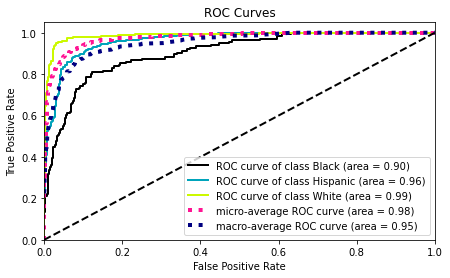

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model_logistic.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### Logistic Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
penalty = ["l1", "l2"]
C = [0.5, 1]
class_weight= ["balanced", None]
param_grid_lo = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight}

In [ ]:
operations = [("column_transformer", column_trans ),
              ("logistic", LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear'))]

pipe_model_logisticgr = Pipeline(steps=operations)

In [ ]:
grid_model_logisticG = GridSearchCV(pipe_model_logisticgr,
                          param_grid_lo,
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
grid_model_logisticG.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('logistic',
                                        LogisticRegression(C=10,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__class_weight': ['balanced', None],
    

In [ ]:
#The best parameters
grid_model_logisticG.best_params_

{'logistic__C': 1, 'logistic__class_weight': None, 'logistic__penalty': 'l1'}

In [ ]:
pd.DataFrame(grid_model_logisticG.cv_results_).loc[grid_model_logisticG.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.893824
mean_train_score    0.905357
Name: 6, dtype: object

In [ ]:
eval_metric(grid_model_logisticG, X_train, y_train, X_test, y_test)

Train_Set
[[ 269  238   36]
 [  46 2953   35]
 [   9   70  959]]
              precision    recall  f1-score   support

       Black       0.83      0.50      0.62       543
    Hispanic       0.91      0.97      0.94      3034
       White       0.93      0.92      0.93      1038

    accuracy                           0.91      4615
   macro avg       0.89      0.80      0.83      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[ 60  61  15]
 [ 24 724  10]
 [  6  16 238]]
              precision    recall  f1-score   support

       Black       0.67      0.44      0.53       136
    Hispanic       0.90      0.96      0.93       758
       White       0.90      0.92      0.91       260

    accuracy                           0.89      1154
   macro avg       0.83      0.77      0.79      1154
weighted avg       0.88      0.89      0.88      1154




In [ ]:
scores = cross_validate(pipe_model_logisticgr,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.894690
train_accuracy              0.910533
test_precision_weighted     0.890109
train_precision_weighted    0.906716
test_recall_weighted        0.894690
train_recall_weighted       0.910533
test_f1_weighted            0.886915
train_f1_weighted           0.904013
dtype: float64

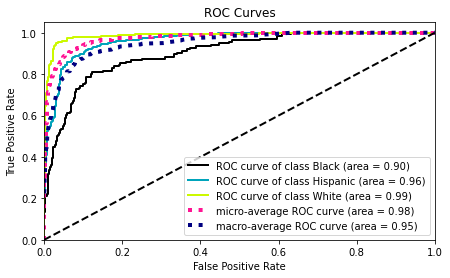

In [ ]:
y_pred_proba = pipe_model_logistic.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [ ]:
operations_SVC = [("column_transformer", column_trans ),
                  ("SVC", SVC(probability=True, random_state=101))]

pipe_model_SVC = Pipeline(steps=operations_SVC)

In [ ]:
pipe_model_SVC.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('SVC', SVC(probability=True, random_state=101))])

In [ ]:
eval_metric(pipe_model_SVC, X_train, y_train, X_test, y_test)

Train_Set
[[ 165  351   27]
 [   8 3011   15]
 [   6  104  928]]
              precision    recall  f1-score   support

       Black       0.92      0.30      0.46       543
    Hispanic       0.87      0.99      0.93      3034
       White       0.96      0.89      0.92      1038

    accuracy                           0.89      4615
   macro avg       0.92      0.73      0.77      4615
weighted avg       0.89      0.89      0.87      4615

Test_Set
[[ 36  90  10]
 [  4 745   9]
 [  1  31 228]]
              precision    recall  f1-score   support

       Black       0.88      0.26      0.41       136
    Hispanic       0.86      0.98      0.92       758
       White       0.92      0.88      0.90       260

    accuracy                           0.87      1154
   macro avg       0.89      0.71      0.74      1154
weighted avg       0.88      0.87      0.85      1154




In [ ]:
scores = cross_validate(pipe_model_SVC,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.874105
train_accuracy              0.888528
test_precision_weighted     0.875747
train_precision_weighted    0.893483
test_recall_weighted        0.874105
train_recall_weighted       0.888528
test_f1_weighted            0.852403
train_f1_weighted           0.869297
dtype: float64

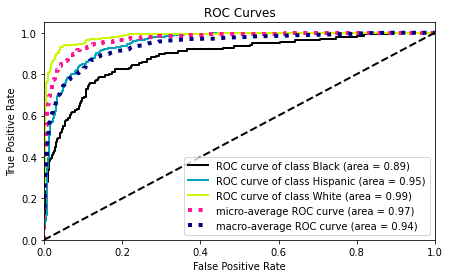

In [ ]:
#pipe_model_SVC.fit(X_train, y_train)
y_pred_proba = pipe_model_SVC.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

###  SVC Model GridsearchCV

In [ ]:
param_grid_SVC = {'SVC__C': [0.5, 1],
              'SVC__gamma': ["scale", "auto", 0.1],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [ ]:
operations = [("column_transformer", column_trans ), ("SVC", SVC(probability=True, random_state=101))]

pipe_model_SVCG = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model_SVCG,
                              param_grid= param_grid_SVC,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': 

In [ ]:
svm_model_grid.best_params_

{'SVC__C': 1,
 'SVC__class_weight': None,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.896206
mean_train_score    0.910485
Name: 19, dtype: object

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 288  228   27]
 [  47 2963   24]
 [  16   72  950]]
              precision    recall  f1-score   support

       Black       0.82      0.53      0.64       543
    Hispanic       0.91      0.98      0.94      3034
       White       0.95      0.92      0.93      1038

    accuracy                           0.91      4615
   macro avg       0.89      0.81      0.84      4615
weighted avg       0.91      0.91      0.90      4615

Test_Set
[[ 65  61  10]
 [ 28 718  12]
 [  8  18 234]]
              precision    recall  f1-score   support

       Black       0.64      0.48      0.55       136
    Hispanic       0.90      0.95      0.92       758
       White       0.91      0.90      0.91       260

    accuracy                           0.88      1154
   macro avg       0.82      0.78      0.79      1154
weighted avg       0.87      0.88      0.88      1154




In [ ]:
scores = cross_validate(pipe_model_SVCG,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.874105
train_accuracy              0.888528
test_precision_weighted     0.875747
train_precision_weighted    0.893483
test_recall_weighted        0.874105
train_recall_weighted       0.888528
test_f1_weighted            0.852403
train_f1_weighted           0.869297
dtype: float64

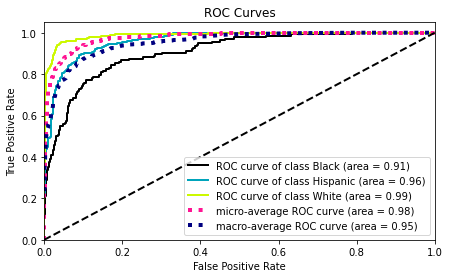

In [ ]:
#svm_model_grid.fit(X_train, y_train)
y_pred_proba = svm_model_grid.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Train_Set
[[ 543    0    0]
 [   0 3034    0]
 [   0    0 1038]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       543
    Hispanic       1.00      1.00      1.00      3034
       White       1.00      1.00      1.00      1038

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

Test_Set
[[ 10 118   8]
 [  1 747  10]
 [  0  78 182]]
              precision    recall  f1-score   support

       Black       0.91      0.07      0.14       136
    Hispanic       0.79      0.99      0.88       758
       White       0.91      0.70      0.79       260

    accuracy                           0.81      1154
   macro avg       0.87      0.59      0.60      1154
weighted avg       0.83      0.81      0.77      1154




In [ ]:
scores = cross_validate(pipe_model_rf,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.807151
train_accuracy              1.000000
test_precision_weighted     0.816049
train_precision_weighted    1.000000
test_recall_weighted        0.807151
train_recall_weighted       1.000000
test_f1_weighted            0.761762
train_f1_weighted           1.000000
dtype: float64

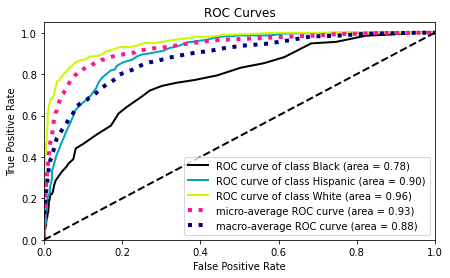

In [ ]:
y_pred_probe = pipe_model_rf.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### RF Model GridsearchCV

In [ ]:
param_grid = {"RF_model__n_estimators": [400, 500],
              "RF_model__max_depth": [2, 3]} # add 1

In [ ]:
operations_rfG = [("OrdinalEncoder", column_trans), ("scaler", scaler),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),]

model_RFG = Pipeline(steps=operations_rfG)
rf_grid_model = GridSearchCV(
    model_RFG,
    param_grid,
    refit='f1_weighted',
    scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
    n_jobs=-1,
    return_train_score=True)

In [ ]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
 

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [ ]:
rf_grid_model.best_score_

0.6350666944279244

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 375  125   43]
 [1102 1674  258]
 [ 183   79  776]]
              precision    recall  f1-score   support

       Black       0.23      0.69      0.34       543
    Hispanic       0.89      0.55      0.68      3034
       White       0.72      0.75      0.73      1038

    accuracy                           0.61      4615
   macro avg       0.61      0.66      0.59      4615
weighted avg       0.77      0.61      0.65      4615

Test_Set
[[ 84  35  17]
 [271 412  75]
 [ 50  21 189]]
              precision    recall  f1-score   support

       Black       0.21      0.62      0.31       136
    Hispanic       0.88      0.54      0.67       758
       White       0.67      0.73      0.70       260

    accuracy                           0.59      1154
   macro avg       0.59      0.63      0.56      1154
weighted avg       0.75      0.59      0.64      1154




In [ ]:
scores = cross_validate(rf_grid_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.592849
train_accuracy              0.612080
test_precision_weighted     0.757289
train_precision_weighted    0.775690
test_recall_weighted        0.592849
train_recall_weighted       0.612080
test_f1_weighted            0.635067
train_f1_weighted           0.652021
dtype: float64

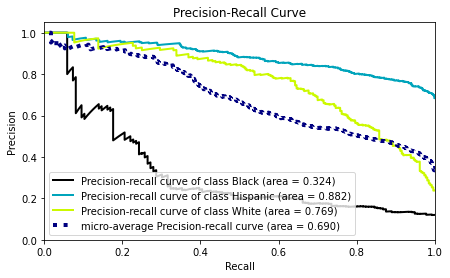

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=3, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Train_Set
[[ 230  286   27]
 [  18 3001   15]
 [   2  102  934]]
              precision    recall  f1-score   support

       Black       0.92      0.42      0.58       543
    Hispanic       0.89      0.99      0.93      3034
       White       0.96      0.90      0.93      1038

    accuracy                           0.90      4615
   macro avg       0.92      0.77      0.81      4615
weighted avg       0.91      0.90      0.89      4615

Test_Set
[[ 44  84   8]
 [  9 727  22]
 [  2  42 216]]
              precision    recall  f1-score   support

       Black       0.80      0.32      0.46       136
    Hispanic       0.85      0.96      0.90       758
       White       0.88      0.83      0.85       260

    accuracy                           0.86      1154
   macro avg       0.84      0.70      0.74      1154
weighted avg       0.85      0.86      0.84      1154




In [ ]:
scores = cross_validate(pipe_model_xgb,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.857205
train_accuracy              0.907963
test_precision_weighted     0.852289
train_precision_weighted    0.911607
test_recall_weighted        0.857205
train_recall_weighted       0.907963
test_f1_weighted            0.839787
train_f1_weighted           0.897560
dtype: float64

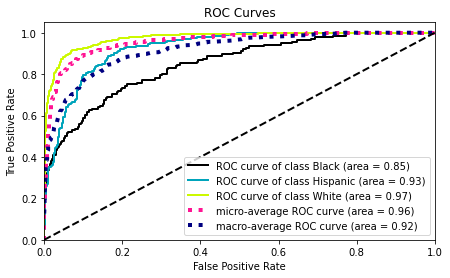

In [ ]:
y_pred_probe = pipe_model_xgb.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=["Hispanic"]),
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
          

In [ ]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(learning_rate=0.05, max_depth=1, n_estimators=40,
                               objective='multi:softprob', random_state=101,
                               subsample=0.8))])

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[  65  451   27]
 [   3 3002   29]
 [   0  723  315]]
              precision    recall  f1-score   support

       Black       0.96      0.12      0.21       543
    Hispanic       0.72      0.99      0.83      3034
       White       0.85      0.30      0.45      1038

    accuracy                           0.73      4615
   macro avg       0.84      0.47      0.50      4615
weighted avg       0.78      0.73      0.67      4615

Test_Set
[[ 19 109   8]
 [  1 745  12]
 [  0 185  75]]
              precision    recall  f1-score   support

       Black       0.95      0.14      0.24       136
    Hispanic       0.72      0.98      0.83       758
       White       0.79      0.29      0.42       260

    accuracy                           0.73      1154
   macro avg       0.82      0.47      0.50      1154
weighted avg       0.76      0.73      0.67      1154




In [ ]:
scores = cross_validate(xgb_grid_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.723944
train_accuracy              0.727844
test_precision_weighted     0.769238
train_precision_weighted    0.773046
test_recall_weighted        0.723944
train_recall_weighted       0.727844
test_f1_weighted            0.659150
train_f1_weighted           0.664976
dtype: float64

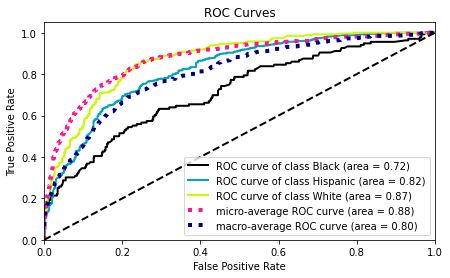

In [ ]:
y_pred_probe = xgb_grid_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

---
---

---
---

## Compare The Models

In [ ]:
models = [xgb_grid_model, rf_grid_model, svm_model_grid, grid_model_logisticG]
model_names = ['XGBoost', 'Random Forest', 'SVM', 'Logistic Regression']

train_accuracy = []
train_precision = []
train_recall = []
train_f1_score = []
train_roc_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_roc_auc = []

for model in models:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train set metrics
    train_accuracy.append(accuracy_score(y_train, train_preds))
    train_precision.append(precision_score(y_train, train_preds, average='macro'))
    train_recall.append(recall_score(y_train, train_preds, average='macro'))
    train_f1_score.append(f1_score(y_train, train_preds, average='macro'))

    train_roc_auc.append(roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr', average='macro'))

    # Test set  ----
    test_accuracy.append(accuracy_score(y_test, test_preds))
    test_precision.append(precision_score(y_test, test_preds, average='macro'))
    test_recall.append(recall_score(y_test, test_preds, average='macro'))
    test_f1_score.append(f1_score(y_test, test_preds, average='macro'))

    # Roc
    test_roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro'))


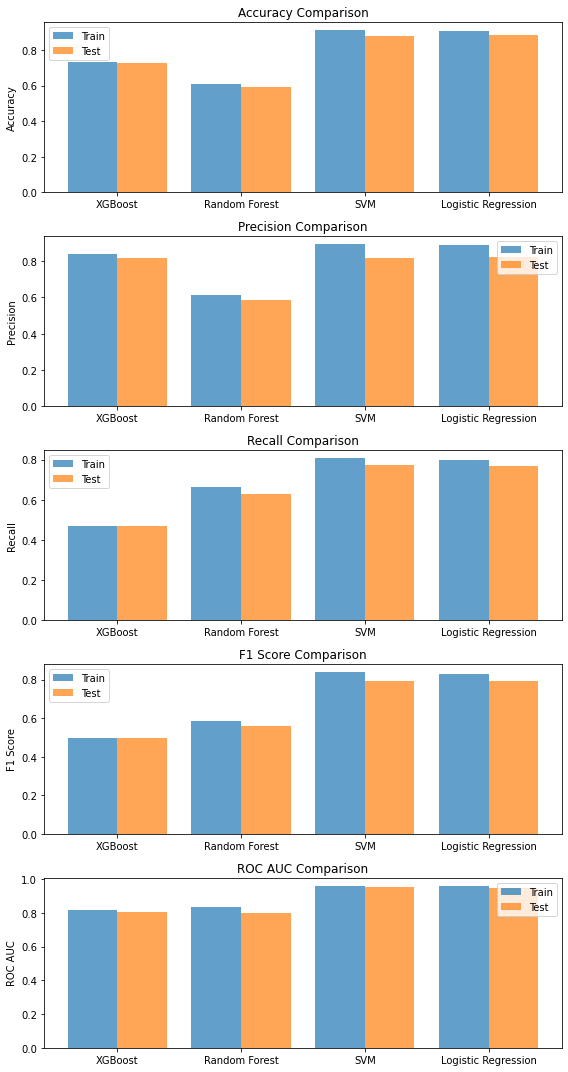

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['XGBoost', 'Random Forest', 'SVM', 'Logistic Regression']

train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 15))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(np.arange(len(model_names)) - 0.2, train_metrics[i], width=0.4, label='Train', align='center', alpha=0.7)
    ax.bar(np.arange(len(model_names)) + 0.2, test_metrics[i], width=0.4, label='Test', align='center', alpha=0.7)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

plt.tight_layout()
plt.show()


So, I found that: Logistic Regression is the best model then SVC then XGB then RF by comparing them with Accuracy and precision

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as impip

## Logistic Regression Over/ Under Sampling

# Both over and under sampling

In [ ]:
Bunder = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
Bover = SMOTE(sampling_strategy = "minority",random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('Bunder', Bunder), ('Bover', Bover) ,('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('Bunder',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('Bover',
                 SMOTE(random_state=101, sampling_strategy='minority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_lr, X_train, y_train, X_test, y_test)

Train_Set
[[ 446   88    9]
 [ 394 2628   12]
 [ 127   84  827]]
              precision    recall  f1-score   support

       Black       0.46      0.82      0.59       543
    Hispanic       0.94      0.87      0.90      3034
       White       0.98      0.80      0.88      1038

    accuracy                           0.85      4615
   macro avg       0.79      0.83      0.79      4615
weighted avg       0.89      0.85      0.86      4615

Test_Set
[[114  19   3]
 [115 637   6]
 [ 35  16 209]]
              precision    recall  f1-score   support

       Black       0.43      0.84      0.57       136
    Hispanic       0.95      0.84      0.89       758
       White       0.96      0.80      0.87       260

    accuracy                           0.83      1154
   macro avg       0.78      0.83      0.78      1154
weighted avg       0.89      0.83      0.85      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('Bunder',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('Bover',
                                        SMOTE(random_state=101,
                                              sampling_strategy='minority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 407   90   46]
 [ 553 2310  171]
 [  81   56  901]]
              precision    recall  f1-score   support

       Black       0.39      0.75      0.51       543
    Hispanic       0.94      0.76      0.84      3034
       White       0.81      0.87      0.84      1038

    accuracy                           0.78      4615
   macro avg       0.71      0.79      0.73      4615
weighted avg       0.85      0.78      0.80      4615

Test_Set
[[ 93  33  10]
 [132 578  48]
 [ 21  20 219]]
              precision    recall  f1-score   support

       Black       0.38      0.68      0.49       136
    Hispanic       0.92      0.76      0.83       758
       White       0.79      0.84      0.82       260

    accuracy                           0.77      1154
   macro avg       0.69      0.76      0.71      1154
weighted avg       0.82      0.77      0.79      1154




# Under sampling

In [ ]:
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('under', under) ,('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_lr, X_train, y_train, X_test, y_test)

Train_Set
[[ 290  233   20]
 [  59 2964   11]
 [  30  113  895]]
              precision    recall  f1-score   support

       Black       0.77      0.53      0.63       543
    Hispanic       0.90      0.98      0.93      3034
       White       0.97      0.86      0.91      1038

    accuracy                           0.90      4615
   macro avg       0.88      0.79      0.82      4615
weighted avg       0.90      0.90      0.89      4615

Test_Set
[[ 66  61   9]
 [ 26 724   8]
 [ 15  24 221]]
              precision    recall  f1-score   support

       Black       0.62      0.49      0.54       136
    Hispanic       0.89      0.96      0.92       758
       White       0.93      0.85      0.89       260

    accuracy                           0.88      1154
   macro avg       0.81      0.76      0.78      1154
weighted avg       0.87      0.88      0.87      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('under',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 406   91   46]
 [ 595 2232  207]
 [  87   60  891]]
              precision    recall  f1-score   support

       Black       0.37      0.75      0.50       543
    Hispanic       0.94      0.74      0.82      3034
       White       0.78      0.86      0.82      1038

    accuracy                           0.76      4615
   macro avg       0.70      0.78      0.71      4615
weighted avg       0.83      0.76      0.78      4615

Test_Set
[[ 92  31  13]
 [141 559  58]
 [ 23  21 216]]
              precision    recall  f1-score   support

       Black       0.36      0.68      0.47       136
    Hispanic       0.91      0.74      0.82       758
       White       0.75      0.83      0.79       260

    accuracy                           0.75      1154
   macro avg       0.68      0.75      0.69      1154
weighted avg       0.81      0.75      0.77      1154




# Over Sampling

In [ ]:
over = SMOTE(sampling_strategy = "minority",random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('over', over) ,('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_r = impip(steps=steps_os)
pipe_os_r.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('over', SMOTE(random_state=101, sampling_strategy='minority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_r, X_train, y_train, X_test, y_test)

Train_Set
[[ 451   82   10]
 [ 394 2612   28]
 [  79   53  906]]
              precision    recall  f1-score   support

       Black       0.49      0.83      0.61       543
    Hispanic       0.95      0.86      0.90      3034
       White       0.96      0.87      0.91      1038

    accuracy                           0.86      4615
   macro avg       0.80      0.85      0.81      4615
weighted avg       0.90      0.86      0.87      4615

Test_Set
[[107  21   8]
 [116 631  11]
 [ 24  12 224]]
              precision    recall  f1-score   support

       Black       0.43      0.79      0.56       136
    Hispanic       0.95      0.83      0.89       758
       White       0.92      0.86      0.89       260

    accuracy                           0.83      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.88      0.83      0.85      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_r, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('over',
                                        SMOTE(random_state=101,
                                              sampling_strategy='minority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 407   92   44]
 [ 536 2330  168]
 [  72   55  911]]
              precision    recall  f1-score   support

       Black       0.40      0.75      0.52       543
    Hispanic       0.94      0.77      0.85      3034
       White       0.81      0.88      0.84      1038

    accuracy                           0.79      4615
   macro avg       0.72      0.80      0.74      4615
weighted avg       0.85      0.79      0.81      4615

Test_Set
[[ 92  33  11]
 [127 584  47]
 [ 18  20 222]]
              precision    recall  f1-score   support

       Black       0.39      0.68      0.49       136
    Hispanic       0.92      0.77      0.84       758
       White       0.79      0.85      0.82       260

    accuracy                           0.78      1154
   macro avg       0.70      0.77      0.72      1154
weighted avg       0.83      0.78      0.79      1154




## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef?
y_pred = model.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7665944109794117

In [ ]:
from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7634430643943982

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
    verbose=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight=None,
    penalty="l1",
    solver="liblinear",
)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Train_Set
[[ 269  238   36]
 [  46 2953   35]
 [   8   71  959]]
              precision    recall  f1-score   support

       Black       0.83      0.50      0.62       543
    Hispanic       0.91      0.97      0.94      3034
       White       0.93      0.92      0.93      1038

    accuracy                           0.91      4615
   macro avg       0.89      0.80      0.83      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[ 61  60  15]
 [ 24 724  10]
 [  6  16 238]]
              precision    recall  f1-score   support

       Black       0.67      0.45      0.54       136
    Hispanic       0.91      0.96      0.93       758
       White       0.90      0.92      0.91       260

    accuracy                           0.89      1154
   macro avg       0.83      0.77      0.79      1154
weighted avg       0.88      0.89      0.88      1154




In [ ]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight=None,
            penalty="l1",
            solver="liblinear",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy               0.892958
train_accuracy              0.905038
test_precision_weighted     0.888675
train_precision_weighted    0.901732
test_recall_weighted        0.892958
train_recall_weighted       0.905038
test_f1_weighted            0.884477
train_f1_weighted           0.896987
dtype: float64

In [ ]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_California',
       'onehotencoder__SubjectsBirthLocation_Colorado',
       'onehotencoder__SubjectsBirthLocation_Florida',
       'onehotencoder__SubjectsBirthLocation_Georgia',
       'onehotencoder__SubjectsBirthLocation_Germany',
       'onehotencoder__SubjectsBirthLocation_Illinois',
       'onehotencoder__SubjectsBirthLocation_Indiana',
       'onehotencoder__SubjectsBirthLocation_Iowa',
       'onehotencoder__Sub

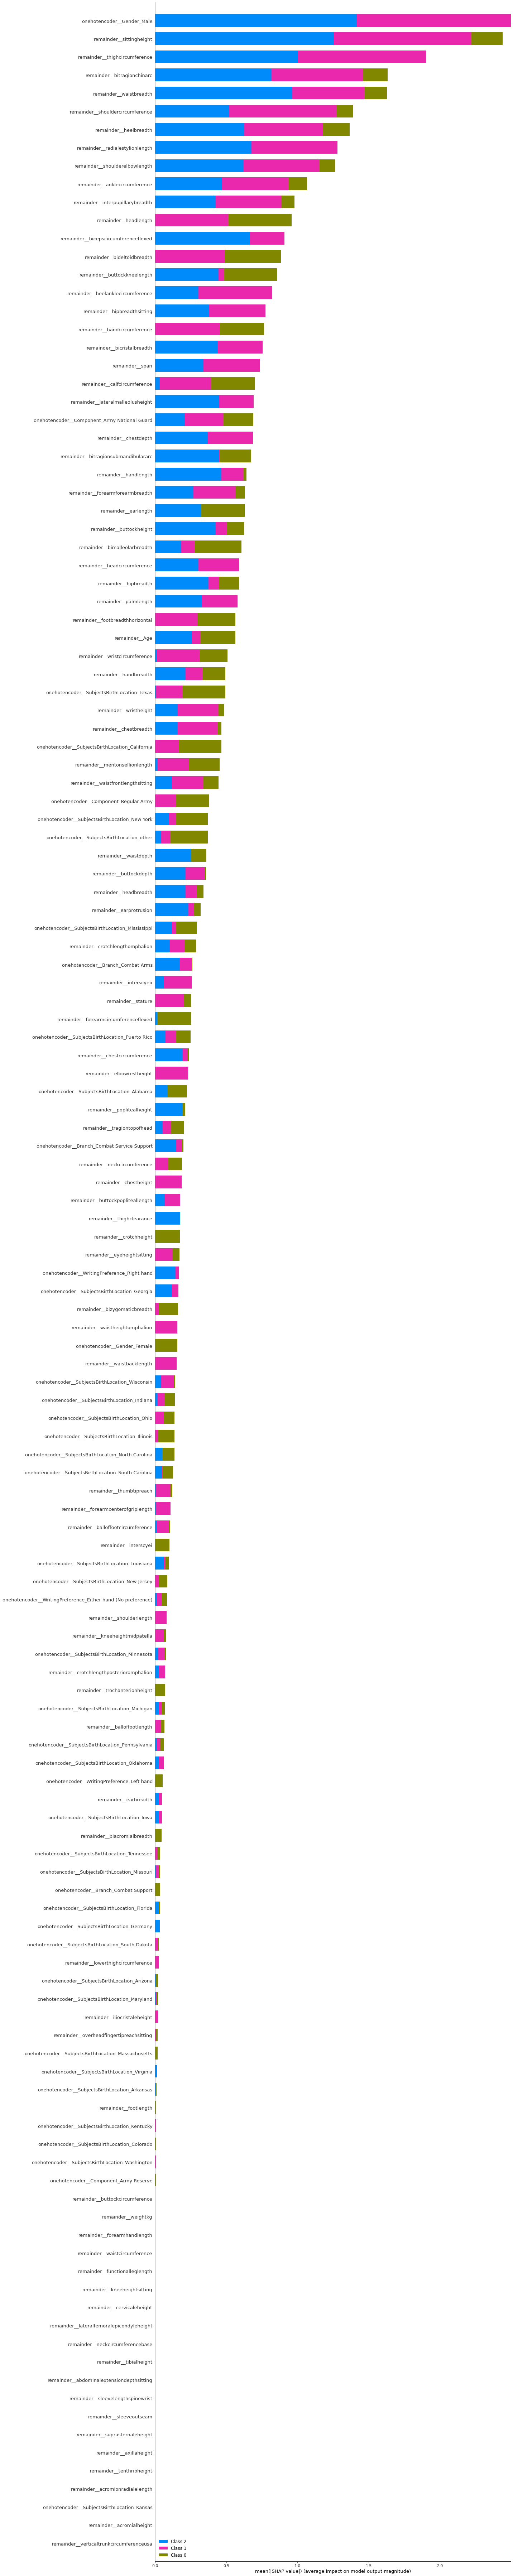

In [ ]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

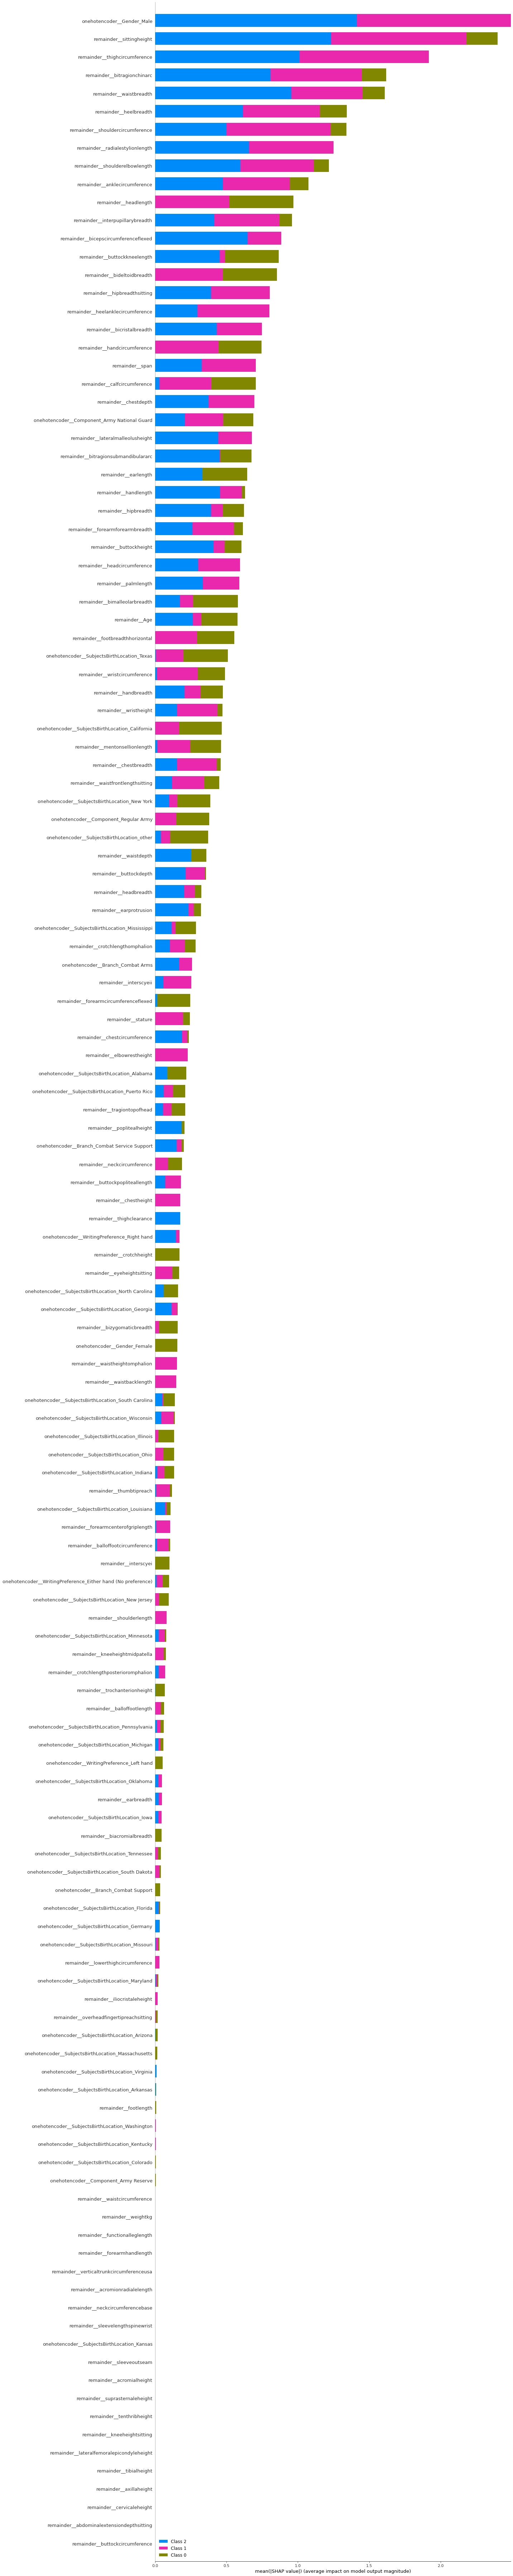

In [ ]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

In [ ]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X[X.Gender == "Female"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.00000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,230.167914,1337.080214,311.917112,216.050267,1241.028342,228.232620,182.378075,365.723529,306.391444,273.383957,450.853476,67.104813,311.005882,287.827807,133.471123,1023.655080,233.627273,835.859358,592.170053,486.511230,373.577005,1397.656150,269.566845,948.540642,248.011765,1173.495187,784.296257,621.756684,342.550802,33.257754,59.343316,20.387166,231.649733,747.855615,92.704278,246.703743,318.369519,264.664706,495.543316,440.730481,1046.428342,78.255615,186.794118,181.371123,147.581818,561.492513,190.135829,310.908556,67.226203,354.506417,399.906952,997.824064,617.077005,373.950802,396.297326,450.182888,512.502674,466.992513,62.881818,401.25615,113.173797,330.122460,371.592513,1311.410160,108.886631,389.167380,241.917647,1029.698396,334.995722,135.548663,856.712299,808.274332,544.663102,1663.371658,1630.521925,1331.775936,1058.235829,617.846524,168.266845,745.088770,438.885561,126.377005,847.280214,1560.928877,425.487166,300.268449,862.134759,213.567914,355.114439,982.197861,680.605882,155.004278,794.997326,28.950802
std,31.575207,56.867243,16.755539,14.811447,54.736303,11.719474,9.464408,18.224303,30.506702,22.345652,28.468449,3.473161,14.204479,15.299237,5.399401,75.154759,24.22101

In [ ]:
female_mean_human = X[X.Gender == "Female"].describe(include="all").loc["mean"]
female_mean_human

abdominalextensiondepthsitting     230.167914
acromialheight                    1337.080214
acromionradialelength              311.917112
anklecircumference                 216.050267
axillaheight                      1241.028342
balloffootcircumference             228.23262
balloffootlength                   182.378075
biacromialbreadth                  365.723529
bicepscircumferenceflexed          306.391444
bicristalbreadth                   273.383957
bideltoidbreadth                   450.853476
bimalleolarbreadth                  67.104813
bitragionchinarc                   311.005882
bitragionsubmandibulararc          287.827807
bizygomaticbreadth                 133.471123
buttockcircumference               1023.65508
buttockdepth                       233.627273
buttockheight                      835.859358
buttockkneelength                  592.170053
buttockpopliteallength              486.51123
calfcircumference                  373.577005
cervicaleheight                   

In [ ]:
female_mean_human["Gender"] = "Male"
female_mean_human["SubjectsBirthLocation"] = "Texas"
female_mean_human["WritingPreference"] = "Left hand"

In [ ]:
pd.DataFrame(female_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
mean,230.167914,1337.080214,311.917112,216.050267,1241.028342,228.23262,182.378075,365.723529,306.391444,273.383957,450.853476,67.104813,311.005882,287.827807,133.471123,1023.65508,233.627273,835.859358,592.170053,486.51123,373.577005,1397.65615,269.566845,948.540642,248.011765,1173.495187,784.296257,621.756684,342.550802,33.257754,59.343316,20.387166,231.649733,747.855615,92.704278,246.703743,318.369519,264.664706,495.543316,440.730481,1046.428342,78.255615,186.794118,181.371123,147.581818,561.492513,190.135829,310.908556,67.226203,354.506417,399.906952,997.824064,617.077005,373.950802,396.297326,450.182888,512.502674,466.992513,62.881818,401.25615,113.173797,330.12246,371.592513,1311.41016,108.886631,389.16738,241.917647,1029.698396,334.995722,135.548663,856.712299,808.274332,544.663102,1663.371658,1630.521925,1331.775936,1058.235829,617.846524,168.266845,745.08877,438.885561,126.377005,847.280214,1560.928877,425.487166,300.268449,862.134759,213.567914,355.114439,982.197861,680.605882,155.004278,794.997326,Male,NaN,NaN,Texas,28.950802,Left hand


In [ ]:
final_model.predict(pd.DataFrame(female_mean_human).T)

array(['Black'], dtype=object)

In [ ]:
y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7332765595814533

In [ ]:
cohen_kappa_score(y_test, y_pred)

0.719193322933086

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___